# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [48]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

from IPython.core.display import display, HTML

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [6]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

608

### Configure Weather Map Api url

In [12]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [19]:
city_weather = []
record_counter = 1
set_counter = 1

print("Beginning Data Retrieval")
print("------------------------")
for city in cities:
    print(f"processing Record {record_counter} of Set {set_counter} | {city}")
    record_counter = record_counter + 1
    
    if record_counter % 50 == 0:
        set_counter = set_counter + 1
    
    
    response = requests.get(query_url + city)
    
    if response.status_code == 404:
        print('City not found. Skipping...')
    else:
        json = response.json()
        city_weather.append(dict({
            "city": json['name'],
            "Lat": json['coord']['lat'], 
            "Lng": json['coord']['lon'],
            "Max Temp": json['main']['temp_max'], 
            "Humidity": json['main']['humidity'],
            "Cloudiness": json['clouds']['all'], 
            "Wind Speed": json['wind']['speed'], 
            "Country": json['sys']['country'], 
            "Date": json['dt']}
        ))
        
print("-----------------------------")
print("Data Retrieval Complete")     
print("-----------------------------")
    

Beginning Data Retrieval
------------------------
processing Record 1 of Set 1 | provideniya
processing Record 2 of Set 1 | kodinsk
processing Record 3 of Set 1 | marcona
City not found. Skipping...
processing Record 4 of Set 1 | rikitea
processing Record 5 of Set 1 | cherskiy
processing Record 6 of Set 1 | koppies
processing Record 7 of Set 1 | hithadhoo
processing Record 8 of Set 1 | bethel
processing Record 9 of Set 1 | chokurdakh
processing Record 10 of Set 1 | belushya guba
City not found. Skipping...
processing Record 11 of Set 1 | ostrovnoy
processing Record 12 of Set 1 | bredasdorp
processing Record 13 of Set 1 | butaritari
processing Record 14 of Set 1 | ushuaia
processing Record 15 of Set 1 | vertientes
processing Record 16 of Set 1 | barentsburg
City not found. Skipping...
processing Record 17 of Set 1 | nizwa
processing Record 18 of Set 1 | wanning
processing Record 19 of Set 1 | maxixe
processing Record 20 of Set 1 | biak
processing Record 21 of Set 1 | sentyabrskiy
City n

processing Record 181 of Set 4 | mar del plata
processing Record 182 of Set 4 | bambous virieux
processing Record 183 of Set 4 | makakilo city
processing Record 184 of Set 4 | kahului
processing Record 185 of Set 4 | auki
processing Record 186 of Set 4 | port moresby
processing Record 187 of Set 4 | scarborough
processing Record 188 of Set 4 | prince george
processing Record 189 of Set 4 | worcester
processing Record 190 of Set 4 | soyo
processing Record 191 of Set 4 | nanortalik
processing Record 192 of Set 4 | acapulco
processing Record 193 of Set 4 | misratah
processing Record 194 of Set 4 | kultuk
processing Record 195 of Set 4 | meyungs
City not found. Skipping...
processing Record 196 of Set 4 | akhalgori
processing Record 197 of Set 4 | nhulunbuy
processing Record 198 of Set 4 | sola
processing Record 199 of Set 4 | kingseat
processing Record 200 of Set 5 | saleaula
City not found. Skipping...
processing Record 201 of Set 5 | merritt island
processing Record 202 of Set 5 | qaqor

processing Record 364 of Set 8 | bemidji
processing Record 365 of Set 8 | poum
processing Record 366 of Set 8 | ilhabela
processing Record 367 of Set 8 | pasni
processing Record 368 of Set 8 | bafia
processing Record 369 of Set 8 | general pico
processing Record 370 of Set 8 | tukuran
processing Record 371 of Set 8 | norman wells
processing Record 372 of Set 8 | nguiu
City not found. Skipping...
processing Record 373 of Set 8 | mitsamiouli
processing Record 374 of Set 8 | novyy urengoy
processing Record 375 of Set 8 | rawannawi
City not found. Skipping...
processing Record 376 of Set 8 | bozuyuk
processing Record 377 of Set 8 | hudson bay
processing Record 378 of Set 8 | cascavel
processing Record 379 of Set 8 | srednekolymsk
processing Record 380 of Set 8 | providencia
processing Record 381 of Set 8 | pathri
processing Record 382 of Set 8 | ati
processing Record 383 of Set 8 | kurtamysh
processing Record 384 of Set 8 | saint-paul
processing Record 385 of Set 8 | palabuhanratu
City not

processing Record 547 of Set 11 | havre-saint-pierre
processing Record 548 of Set 11 | karaul
City not found. Skipping...
processing Record 549 of Set 11 | gizo
processing Record 550 of Set 12 | port macquarie
processing Record 551 of Set 12 | norwich
processing Record 552 of Set 12 | fuxin
processing Record 553 of Set 12 | koumac
processing Record 554 of Set 12 | karakendzha
City not found. Skipping...
processing Record 555 of Set 12 | oga
processing Record 556 of Set 12 | gravdal
processing Record 557 of Set 12 | fare
processing Record 558 of Set 12 | grindavik
processing Record 559 of Set 12 | sibut
processing Record 560 of Set 12 | jalu
processing Record 561 of Set 12 | pacific grove
processing Record 562 of Set 12 | huambo
processing Record 563 of Set 12 | eidfjord
processing Record 564 of Set 12 | lixourion
processing Record 565 of Set 12 | canico
processing Record 566 of Set 12 | piopio
processing Record 567 of Set 12 | lebu
processing Record 568 of Set 12 | guerrero negro
proce

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [22]:
city_weather_df = pd.DataFrame(city_weather)
city_weather_df.to_csv(output_data_file, index=False)
city_weather_df

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,5.06,60,40,7.00,RU,1622606639
1,Kodinsk,58.6881,99.1844,24.47,27,6,3.44,RU,1622606639
2,Rikitea,-23.1203,-134.9692,22.10,59,8,9.41,PF,1622606875
3,Cherskiy,68.7500,161.3000,19.99,23,8,1.85,RU,1622606876
4,Koppies,-27.2418,27.5742,2.32,74,5,2.54,ZA,1622606876
...,...,...,...,...,...,...,...,...,...
545,Aksu,41.1231,80.2644,29.06,23,75,3.60,CN,1622607044
546,Oistins,13.0667,-59.5333,26.05,65,40,6.17,BB,1622607045
547,Ossora,59.2353,163.0719,9.39,53,97,4.40,RU,1622607015
548,High Rock,26.6208,-78.2833,24.01,79,100,7.77,BS,1622607045


In [23]:
city_weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,20.447705,19.630447,19.369709,69.556364,58.385455,3.236091,1.622607e+09
std,33.431788,92.061025,8.491661,20.550163,37.491087,2.220426,9.444119e+01
min,-54.800000,-179.166700,-5.940000,5.000000,0.000000,0.000000,1.622606e+09
25%,-8.664550,-63.337525,13.372500,60.000000,20.000000,1.540000,1.622607e+09
50%,25.391450,25.101350,20.285000,74.000000,67.000000,2.690000,1.622607e+09
75%,47.889100,102.500000,25.845000,85.000000,98.000000,4.657500,1.622607e+09
max,78.218600,179.316700,37.170000,100.000000,100.000000,11.320000,1.622607e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [50]:
if (city_weather_df['Humidity'] > 100).any():
    display(HTML(city_weather_df[city_weather_df["Humidity"] > 100].describe().to_html()))


In [51]:
#  Get the indices of cities that have humidity over 100%.
humidity_outlier_index = []

if (city_weather_df['Humidity'] > 100).any():
    humidity_outlier_index = df.index[df['Humidity'] > 100 ].tolist()

humidity_outlier_index   

[]

In [53]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_City_data = pd.DataFrame([])

if (city_weather_df['Humidity'] > 100).any():
    humidity_outlier_index = df.index[df['Humidity'] > 100 ].tolist()
    clean_City_data = city_weather_df.drop(humidity_outlier_index, inplace=False)
else:
    clean_City_data = city_weather_df
    
clean_City_data

,city,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Provideniya,64.3833,-173.3000,5.06,60,40,7.00,RU,1622606639
1,Kodinsk,58.6881,99.1844,24.47,27,6,3.44,RU,1622606639
2,Rikitea,-23.1203,-134.9692,22.10,59,8,9.41,PF,1622606875
3,Cherskiy,68.7500,161.3000,19.99,23,8,1.85,RU,1622606876
4,Koppies,-27.2418,27.5742,2.32,74,5,2.54,ZA,1622606876
...,...,...,...,...,...,...,...,...,...
545,Aksu,41.1231,80.2644,29.06,23,75,3.60,CN,1622607044
546,Oistins,13.0667,-59.5333,26.05,65,40,6.17,BB,1622607045
547,Ossora,59.2353,163.0719,9.39,53,97,4.40,RU,1622607015
548,High Rock,26.6208,-78.2833,24.01,79,100,7.77,BS,1622607045


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

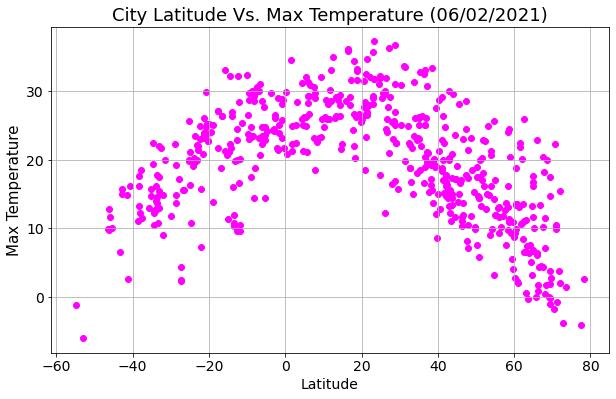

In [66]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(clean_City_data["Lat"], 
                   clean_City_data["Max Temp"], color='magenta')
                                                         
graph_axes.set_title("City Latitude Vs. Max Temperature (" + pd.to_datetime("today").strftime("%m/%d/%Y") + ")" , fontsize=18)
graph_axes.set_ylabel("Max Temperature (F)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()    

## Latitude vs. Humidity Plot

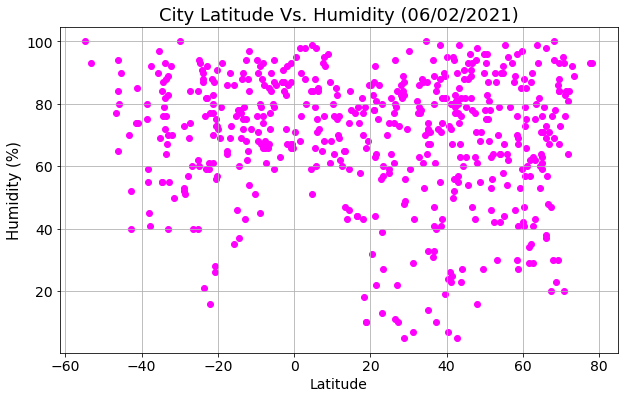

In [67]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(clean_City_data["Lat"], 
                   clean_City_data["Humidity"], color='magenta')
                                                         
graph_axes.set_title("City Latitude Vs. Humidity (" + pd.to_datetime("today").strftime("%m/%d/%Y") + ")" , fontsize=18)
graph_axes.set_ylabel("Humidity (%)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

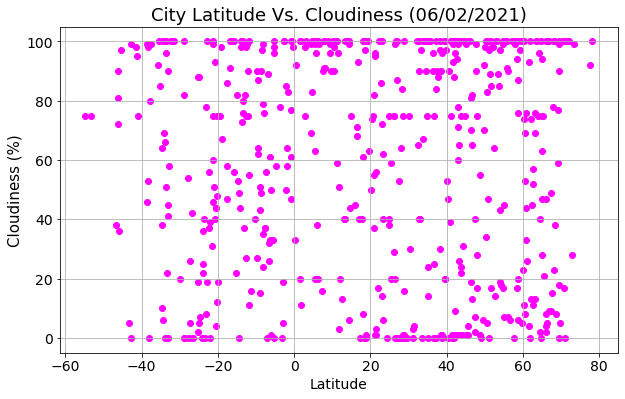

In [68]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(clean_City_data["Lat"], 
                   clean_City_data["Cloudiness"], color='magenta')
                                                         
graph_axes.set_title("City Latitude Vs. Cloudiness (" + pd.to_datetime("today").strftime("%m/%d/%Y") + ")" , fontsize=18)
graph_axes.set_ylabel("Cloudiness (%)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

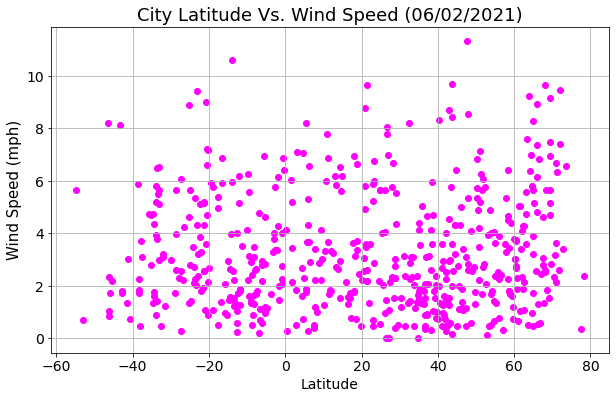

In [71]:
graph, graph_axes = plt.subplots(figsize=(10,6))
graph_axes.scatter(clean_City_data["Lat"], 
                   clean_City_data["Wind Speed"], color='magenta')
                                                         
graph_axes.set_title("City Latitude Vs. Wind Speed (" + pd.to_datetime("today").strftime("%m/%d/%Y") + ")" , fontsize=18)
graph_axes.set_ylabel("Wind Speed (mph)", fontsize=15);
graph_axes.set_xlabel("Latitude", fontsize=14);
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression